In [311]:
import pandas;
import numpy;
import matplotlib.pyplot as plt;
import seaborn;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression;
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score;

In [312]:
# Load data from CSV
data_frame = pandas.DataFrame(pandas.read_csv("Advertising.csv"));

# Drop first column since its an ID
data_frame = data_frame.drop(data_frame.columns[0], axis=1);

# Print the head.
print(data_frame.head());

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [313]:
print(data_frame["Newspaper"].sort_values());

33       0.3
65       0.9
8        1.0
139      1.7
42       1.8
       ...  
118     79.2
165     84.8
75      89.4
101    100.9
16     114.0
Name: Newspaper, Length: 200, dtype: float64


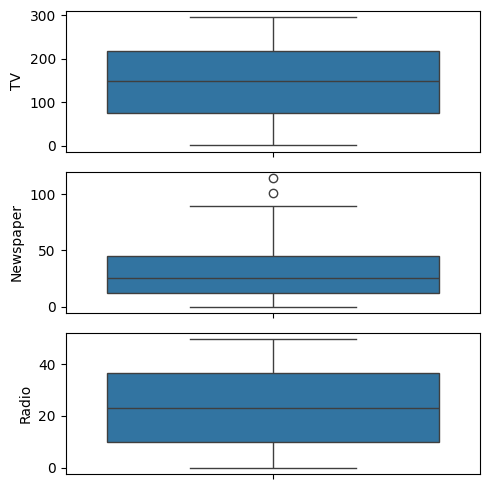

In [314]:
# Doing Boxplot analysis for outlier detection
figure, axis = plt.subplots(3, figsize = (5,5));

column_names = data_frame.columns.values.tolist();

# Boxplotting for TV
plt1 = seaborn.boxplot(data_frame['TV'], ax = axis[0]);

# Boxplotting for Newspaper
plt2 = seaborn.boxplot(data_frame['Newspaper'], ax = axis[1]);

# Boxplotting for Radio
plt3 = seaborn.boxplot(data_frame['Radio'], ax = axis[2]);

plt.tight_layout();

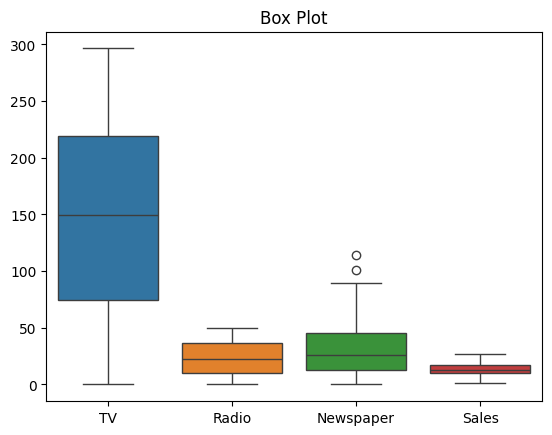

In [315]:
seaborn.boxplot(data = data_frame);

plt.title("Box Plot");

plt.show();

How to read Boxplot analysis:

```
-
|
|
= Q3
|
|
= Q2
|
|
= Q1
|
|
_
```

The outside of Q1 to Q3 are considered as an outlier. The outside of the - are considered as an anomaly.

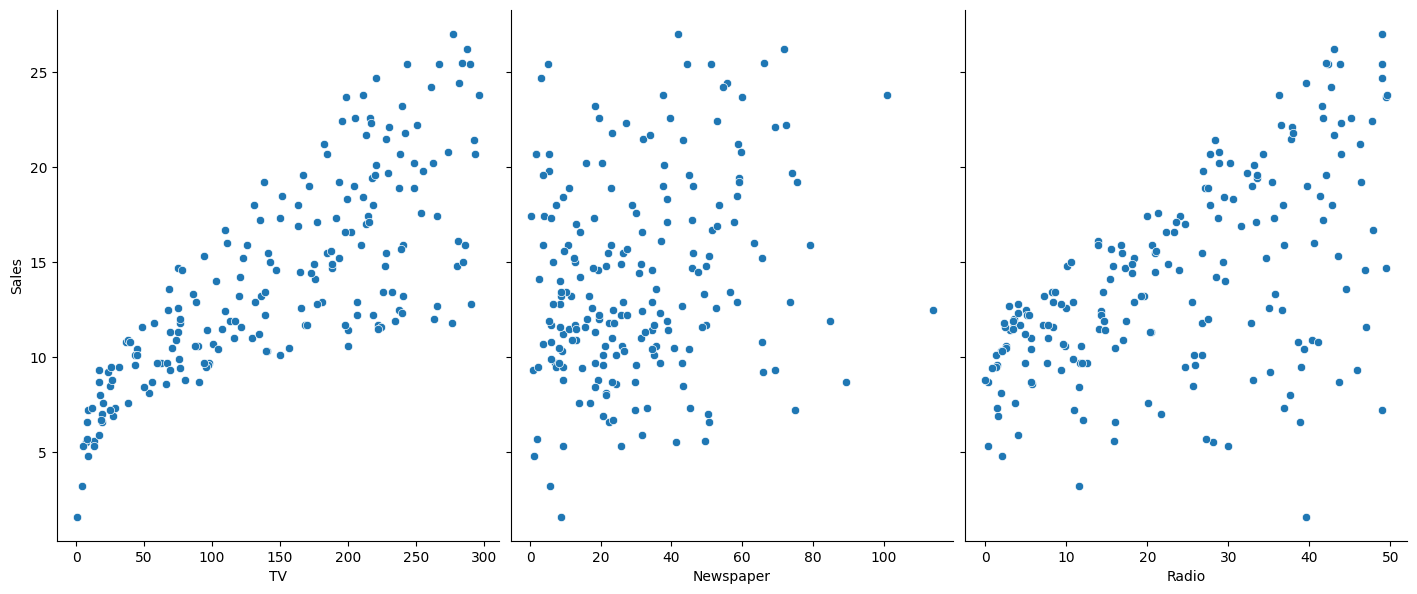

In [316]:
# Make a scatterplot to check how related are every attributes within the data
seaborn.pairplot(data_frame, x_vars=["TV", "Newspaper", "Radio"], y_vars = "Sales", height = 6, aspect = 0.8, kind = "scatter");

plt.show();

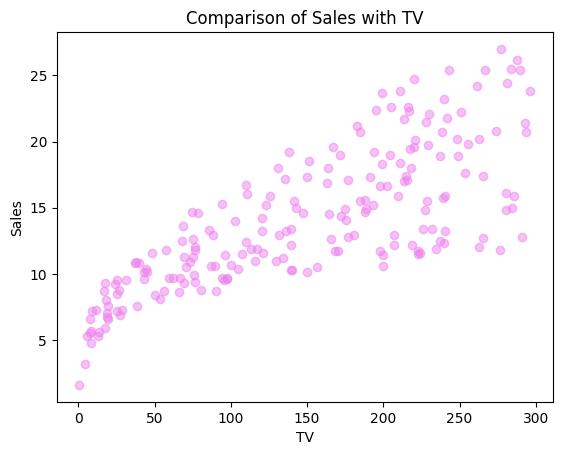

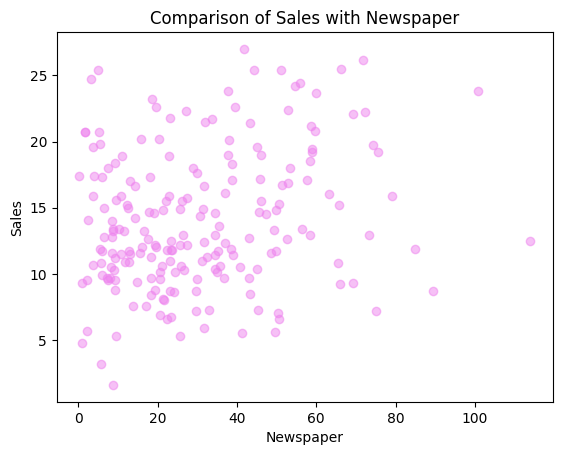

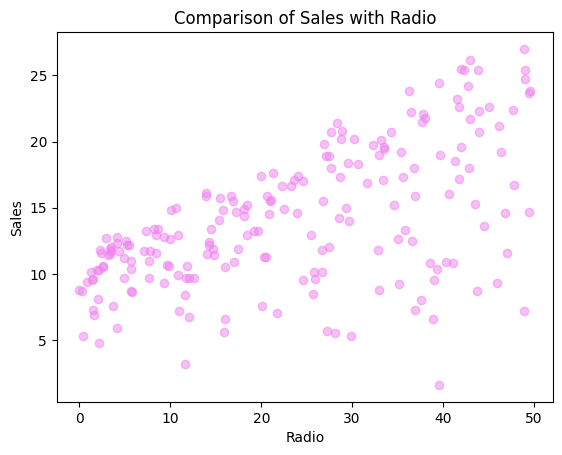

In [317]:
for i, column in enumerate(["TV", "Newspaper", "Radio"], 1):
    plt.scatter(data_frame[column], data_frame["Sales"], alpha=0.5, c = "violet");
    plt.xlabel(column);
    plt.ylabel("Sales");
    plt.title("Comparison of Sales with "+ column);
    plt.show();

# Correlation part

By plotting these values above, since the TV has more stable and groupped points, we can assume that the highest correlation within the 

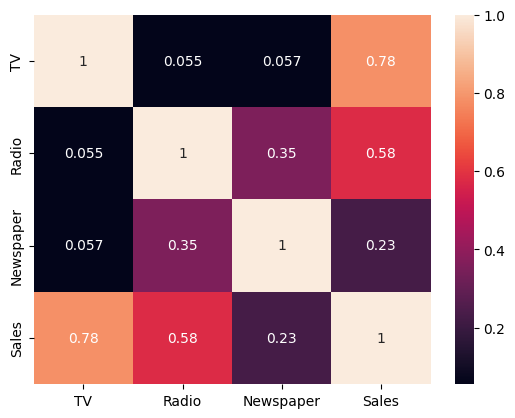

In [318]:
# Correlation Heatmap
correlation = data_frame.corr();

seaborn.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True);

In [319]:
# Since TV is the highest correlation, we can just use TV for predicting the Sales

# X = data_frame.drop(columns="Sales");
# X = data_frame[["TV", "Radio"]];
X = data_frame[["TV"]];
Y = data_frame["Sales"];

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100);
print(Y_train.head());

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: Sales, dtype: float64


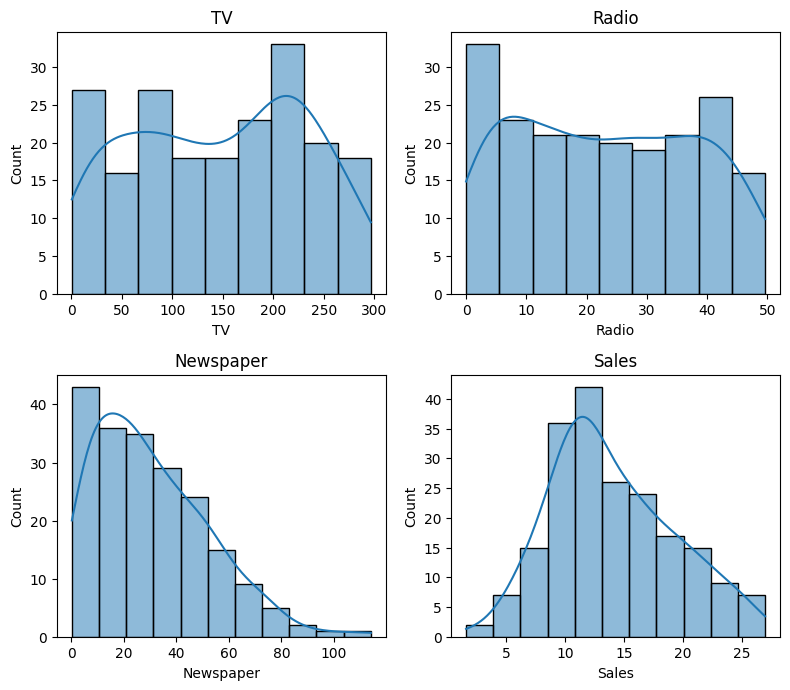

In [320]:
plt.figure(figsize = (8, 10));

for i, column in enumerate(["TV", "Radio", "Newspaper", "Sales"], 1):
    plt.subplot(3, 2, i);
    seaborn.histplot(data = data_frame[column], kde = True);
    plt.title(column);
    plt.xlabel(column);

plt.tight_layout();
plt.show();

In [321]:
model = LinearRegression();
model.fit(X_train, Y_train);

prediction_output = model.predict(X_test);

print("MAE: ", mean_absolute_error(Y_test, prediction_output));
print("MSE: ", mean_squared_error(Y_test, prediction_output));
print("R-Square: ", r2_score(Y_test, prediction_output));

MAE:  2.161984932672072
MSE:  7.975798532854851
R-Square:  0.5942987267783302


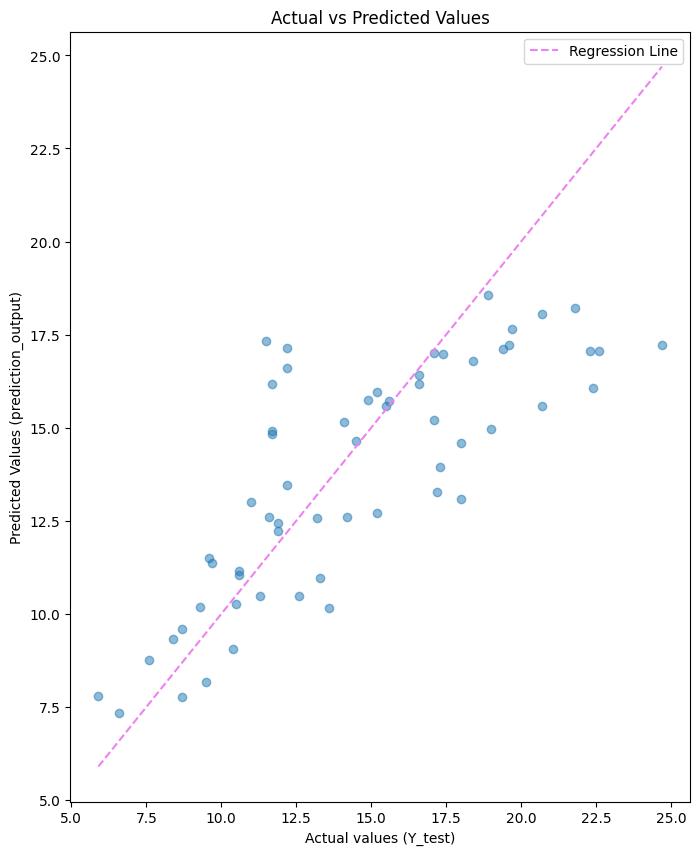

In [327]:
# Setup new plotter
plt.figure(figsize = (8, 10));
plt.scatter(Y_test, prediction_output, alpha = 0.5);
plt.xlabel("Actual values (Y_test)");
plt.ylabel("Predicted Values (prediction_output)");
plt.title("Actual vs Predicted Values");

# Make a centroid line with format of ---
line_x = numpy.linspace(min(Y_test), max(Y_test), 100);
line_y = line_x;
plt.plot(line_x, line_y, color = "violet", linestyle = "--", label = "Regression Line");

# Generate legend
plt.legend();

# Show plotter
plt.show();